# Data Preprocessing

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing Dataset

In [2]:
df = pd.read_csv('Datasets/kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.shape

(21613, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Split Feature and Target

In [7]:
X = df.drop(columns=['id', 'date', 'price'], axis=1)
y = df['price']

In [8]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Split The Dataset into Training and Testing set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [10]:
X_train.shape

(17290, 18)

In [11]:
X_test.shape

(4323, 18)

# Modeling

## Multiple Linear Regression Model

### Training

In [12]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

### Predicting

In [13]:
lin_reg_pred = lin_reg.predict(X_test)
df_result = pd.DataFrame({'Actual': y_test, 'Predicted': lin_reg_pred})

print(df_result.head())

          Actual     Predicted
17384   297000.0  3.784482e+05
722    1578000.0  1.539749e+06
2680    562100.0  5.444599e+05
18754   631500.0  5.778039e+05
14554   780000.0  9.799229e+05


### Evaluating

In [14]:
from sklearn.metrics import r2_score
lin_reg_score = r2_score(y_test, lin_reg_pred)
print(lin_reg_score)

0.694931009511779


## Polynomial Regression Model

### Training

In [15]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3)
X_poly = poly.fit_transform(X_train)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y_train)

LinearRegression()

### Predicting

In [16]:
poly_reg_pred = poly_reg.predict(poly.transform(X_test))

df_result_2 = pd.DataFrame({'Actual': y_test, 'Predicted': poly_reg_pred})

print(df_result_2.head())

          Actual     Predicted
17384   297000.0  4.065201e+05
722    1578000.0  1.981250e+06
2680    562100.0  5.892729e+05
18754   631500.0  5.984472e+05
14554   780000.0  7.811333e+05


### Evaluating

In [17]:
from sklearn.metrics import r2_score
poly_reg_score = r2_score(y_test, poly_reg_pred)
print(poly_reg_score)

0.38705834881141465


## Decision Tree Regression Model

### Training

In [18]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state = 0)
dec_tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

### Predicting

In [19]:
dec_tree_reg_pred = dec_tree_reg.predict(X_test)

df_result_3 = pd.DataFrame({'Actual': y_test, 'Predicted': dec_tree_reg_pred})

print(df_result_3.head())

          Actual  Predicted
17384   297000.0   288000.0
722    1578000.0  1680000.0
2680    562100.0   459500.0
18754   631500.0   485000.0
14554   780000.0   609000.0


### Evaluating

In [20]:
from sklearn.metrics import r2_score
dec_tree_reg_score = r2_score(y_test, dec_tree_reg_pred)
print(dec_tree_reg_score)

0.7805404978688906


## Random Forest Model

### Training

In [21]:
from sklearn.ensemble import RandomForestRegressor
rand_for_reg = RandomForestRegressor(n_estimators = 10, random_state = 0)
rand_for_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

### Predicting

In [22]:
rand_for_reg_pred = rand_for_reg.predict(X_test)

df_result_4 = pd.DataFrame({'Actual': y_test, 'Predicted': rand_for_reg_pred})

print(df_result_4.head())

          Actual  Predicted
17384   297000.0   369687.5
722    1578000.0  1768530.0
2680    562100.0   543845.0
18754   631500.0   525920.0
14554   780000.0   679895.0


### Evaluating

In [23]:
from sklearn.metrics import r2_score
rand_for_reg_score = r2_score(y_test, rand_for_reg_pred)
print(rand_for_reg_score)

0.8780373864169149


## Support Vector Regression Model

## Scaling Features

In [24]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train.to_numpy().reshape(len(y_train), 1))
y_train = y_train.ravel()

## Training

In [25]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train)

SVR()

## Predicting

In [28]:
svr_pred = sc_y.inverse_transform(svr.predict(sc_X.transform(X_test)).reshape(-1, 1))

df_result_5 = pd.DataFrame({'Actual': y_test, 'Predicted': svr_pred.ravel()})

print(df_result_5.head())

          Actual     Predicted
17384   297000.0  3.417039e+05
722    1578000.0  1.727953e+06
2680    562100.0  5.450566e+05
18754   631500.0  6.108614e+05
14554   780000.0  7.694322e+05


## Evaluating

In [29]:
from sklearn.metrics import r2_score
svr_score = r2_score(y_test, svr_pred)
print(svr_score)

0.7995637815126126


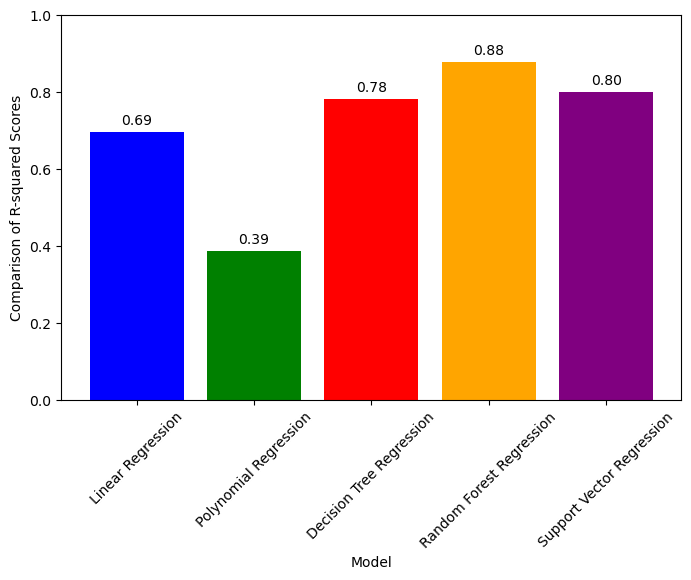

In [38]:
model_scores = {
    'Linear Regression' : lin_reg_score,
    'Polynomial Regression' : poly_reg_score,
    'Decision Tree Regression' : dec_tree_reg_score,
    'Random Forest Regression' : rand_for_reg_score,
    'Support Vector Regression' : svr_score
}

plt.figure(figsize=(8, 5))
bars = plt.bar(model_scores.keys(), model_scores.values(), color=['blue', 'green', 'red', 'orange', 'purple'])

for bar in bars:
    yval = bar.get_height()  # Ambil nilai tinggi bar (R² score)
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{yval:.2f}', ha='center', fontsize=10)
    
plt.xlabel('Model')
plt.ylabel('Comparison of R-squared Scores')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()